# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [5]:
%run creds.ipynb
import pandas as pd

archive_data=pd.read_csv('twitter-archive-enhanced.csv')



2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
import requests
import os
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
tweet_image_prediction = pd.read_csv('image-predictions.tsv','\t')


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
# import tweepy
# tweepy.__version__ 
# id_of_tweet = archive_data['tweet_id'].tolist()
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)
# client = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)
# tweet_fields=["id","public_metrics"]
# df_twitter = []
# for tweet_id in id_of_tweet:
#     twitter_data={}
#     temp = client.get_tweet(id = tweet_id,tweet_fields=tweet_fields)
#     tweet_data=temp.data
#     for key in tweet_fields:
#         if tweet_data and tweet_data.get(key):
#             twitter_data[key]=tweet_data[key]
#             df_twitter.append(twitter_data)
#         else:
#             print(f"empty_tweet:{tweet_id},tweet_info:{temp.data}")               


In [8]:
# tweet_data = pd.DataFrame(df_twitter)
# tweet_data.to_csv('tweet_data.csv',index=False)
tweet_data=pd.read_csv('tweet_json.txt')
tweet_data.head()

,id,public_metrics
0,892420643555336193,"{'retweet_count': 7076, 'reply_count': 144, 'l..."
1,892420643555336193,"{'retweet_count': 7076, 'reply_count': 144, 'l..."
2,892177421306343426,"{'retweet_count': 5344, 'reply_count': 172, 'l..."
3,892177421306343426,"{'retweet_count': 5344, 'reply_count': 172, 'l..."
4,891815181378084864,"{'retweet_count': 3514, 'reply_count': 110, 'l..."


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
archive_data.head()



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
archive_data['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        None
2352           a
2353          

In [11]:
archive_data['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [12]:

archive_data['expanded_urls'].duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
2337    False
2338     True
2339    False
2340    False
2341    False
2342    False
2343    False
2344    False
2345    False
2346    False
2347    False
2348    False
2349    False
2350    False
2351    False
2352    False
2353    False
2354    False
2355    False
Name: expanded_urls, Length: 2356, dtype: bool

In [13]:
archive_data['expanded_urls'][archive_data['expanded_urls'].duplicated()]

55                                                    NaN
64                                                    NaN
75      https://www.gofundme.com/3yd6y1c,https://twitt...
76      https://twitter.com/dog_rates/status/878057613...
98      https://www.gofundme.com/help-my-baby-sierra-g...
113                                                   NaN
126     https://www.gofundme.com/3ti3nps,https://twitt...
135     https://twitter.com/dog_rates/status/866450705...
136     https://twitter.com/dog_rates/status/866334964...
148                                                   NaN
150     https://www.gofundme.com/helpquinny,https://tw...
161     https://www.gofundme.com/help-lorenzo-beat-can...
169     https://twitter.com/dog_rates/status/859196978...
179                                                   NaN
185                                                   NaN
186                                                   NaN
188                                                   NaN
189           

In [14]:
archive_data['expanded_urls'][archive_data['expanded_urls'].isnull()]

30      NaN
55      NaN
64      NaN
113     NaN
148     NaN
179     NaN
185     NaN
186     NaN
188     NaN
189     NaN
218     NaN
228     NaN
234     NaN
274     NaN
290     NaN
291     NaN
313     NaN
342     NaN
346     NaN
375     NaN
387     NaN
409     NaN
427     NaN
498     NaN
513     NaN
570     NaN
576     NaN
611     NaN
701     NaN
707     NaN
843     NaN
857     NaN
967     NaN
1005    NaN
1080    NaN
1295    NaN
1345    NaN
1445    NaN
1446    NaN
1474    NaN
1479    NaN
1497    NaN
1523    NaN
1598    NaN
1605    NaN
1618    NaN
1663    NaN
1689    NaN
1774    NaN
1819    NaN
1844    NaN
1895    NaN
1905    NaN
1914    NaN
1940    NaN
2038    NaN
2149    NaN
2189    NaN
2298    NaN
Name: expanded_urls, dtype: object

In [15]:
archive_data['name'][0]

'Phineas'

In [16]:
archive_data['source'][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [17]:
archive_data['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [18]:
tweet_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
tweet_image_prediction['p1']

0            Welsh_springer_spaniel
1                           redbone
2                   German_shepherd
3               Rhodesian_ridgeback
4                miniature_pinscher
5              Bernese_mountain_dog
6                        box_turtle
7                              chow
8                     shopping_cart
9                  miniature_poodle
10                 golden_retriever
11                    Gordon_setter
12                     Walker_hound
13                              pug
14                       bloodhound
15                            Lhasa
16                   English_setter
17                              hen
18                 desktop_computer
19                Italian_greyhound
20                      Maltese_dog
21                 three-toed_sloth
22                               ox
23                 golden_retriever
24                         malamute
25                       guinea_pig
26      soft-coated_wheaten_terrier
27                        Ch

In [20]:
tweet_image_prediction['p2']

0                         collie
1             miniature_pinscher
2                       malinois
3                        redbone
4                     Rottweiler
5               English_springer
6                     mud_turtle
7                Tibetan_mastiff
8                shopping_basket
9                       komondor
10               Tibetan_mastiff
11             Yorkshire_terrier
12              English_foxhound
13                  bull_mastiff
14               German_shepherd
15                      Shih-Tzu
16                  Newfoundland
17                          cock
18                          desk
19                   toy_terrier
20                    toy_poodle
21                         otter
22                  Newfoundland
23      Chesapeake_Bay_retriever
24                Siberian_husky
25                         skunk
26                  Afghan_hound
27                   toy_terrier
28                    bloodhound
29                    barracouta
          

In [21]:
tweet_image_prediction['p3']

0                 Shetland_sheepdog
1               Rhodesian_ridgeback
2                        bloodhound
3                miniature_pinscher
4                          Doberman
5        Greater_Swiss_Mountain_dog
6                          terrapin
7                          fur_coat
8                  golden_retriever
9       soft-coated_wheaten_terrier
10               Labrador_retriever
11                         Pekinese
12                     Ibizan_hound
13                   French_bulldog
14                         malinois
15                   Dandie_Dinmont
16                           borzoi
17                        partridge
18                         bookcase
19                          basenji
20                 miniature_poodle
21                   great_grey_owl
22                      groenendael
23               Labrador_retriever
24                       Eskimo_dog
25                          hamster
26                           briard
27                         p

In [22]:
tweet_image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
721,685973236358713344,https://pbs.twimg.com/media/CYURBGoWYAAKey3.jpg,1,Siberian_husky,0.450678,True,Eskimo_dog,0.430275,True,malamute,0.118590,True
346,672466075045466113,https://pbs.twimg.com/media/CVUUU_EWoAAxABV.jpg,1,cocker_spaniel,0.150424,True,toy_poodle,0.088605,True,Welsh_springer_spaniel,0.072014,True
668,683030066213818368,https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg,1,boxer,0.722218,True,bull_mastiff,0.193804,True,French_bulldog,0.055194,True
1268,749417653287129088,https://pbs.twimg.com/media/CmZ3YH9WEAAowi3.jpg,2,papillon,0.772894,True,Shetland_sheepdog,0.042408,True,collie,0.042313,True
246,670474236058800128,https://pbs.twimg.com/media/CU4AwqQWUAAEgE2.jpg,1,wool,0.070076,False,siamang,0.062536,False,gorilla,0.058894,False
1846,839239871831150596,https://pbs.twimg.com/media/C6WUNadWYAAPxHv.jpg,3,Leonberg,0.927021,True,Newfoundland,0.050009,True,Saint_Bernard,0.010728,True
1317,755206590534418437,https://pbs.twimg.com/media/CnsIT0WWcAAul8V.jpg,1,web_site,0.906673,False,printer,0.008600,False,carton,0.004533,False
1010,709409458133323776,https://pbs.twimg.com/media/CdhUIMSUIAA4wYK.jpg,1,Shetland_sheepdog,0.797450,True,collie,0.054055,True,keeshond,0.031673,True
1956,864873206498414592,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,2,pole,0.478616,False,lakeside,0.114182,False,wreck,0.055926,False
311,671544874165002241,https://pbs.twimg.com/media/CVHOgDvU4AAfrXD.jpg,1,feather_boa,0.240858,False,wig,0.085946,False,wool,0.040674,False


In [23]:
tweet_data.head()

,id,public_metrics
0,892420643555336193,"{'retweet_count': 7076, 'reply_count': 144, 'l..."
1,892420643555336193,"{'retweet_count': 7076, 'reply_count': 144, 'l..."
2,892177421306343426,"{'retweet_count': 5344, 'reply_count': 172, 'l..."
3,892177421306343426,"{'retweet_count': 5344, 'reply_count': 172, 'l..."
4,891815181378084864,"{'retweet_count': 3514, 'reply_count': 110, 'l..."


In [24]:
archive_data[archive_data.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [25]:
tweet_image_prediction[tweet_image_prediction.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Quality issues
1.Fixing data types for archive data columns such as timestamp

2.Drop columns such as inreply to status id, inreply user id,retweeted status id, retweeted user id, retweeted timestap for archive data table

3.Expand urls columns got null values,duplicated values and some urls are not  properly defined (repeated urls in the same link)

4.Fixing lower case letter to uppercase for first letter for p1, p2, p3 columns in tweet_image_prediction table

5.The source column in archive data table needs to be addressed as it got some unknown characters commonly notated across all the rows. That needs to be taken care of.

6.The text data column in archive data table needs to be cleaned as it got some unnecessary sentences after the second sentence.

7.The name column in archive data table consists of single valued characters as  well as none values. This needs to be addressed.

### Tidiness issues
1.Merging all dog stage columns into single column

2.The public_metrics column from  tweet_data table is not meeting the requiremnets of tidiness i.e.The retweet count,favorite count and like count needs to be in seperrate columns to meet the requirements of tidiness.
There are three requirements for tidiness.

Each variable forms a column
Each observation forms a row
Each type of observational unit forms a table



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [26]:
# Make copies of original pieces of data
archive_data_clean = archive_data.copy()
tweet_image_prediction_clean = tweet_image_prediction.copy()
tweet_data_clean = tweet_data.copy()


### Issue #1:Fixing data type for archive data table column such as timestamp.

#### Define: 
Convert timestamp column from object type to datetime type.

#### Code

In [27]:
archive_data_clean['timestamp']=pd.to_datetime(archive_data_clean['timestamp'])

#### Test

In [28]:
archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue #2: Addressing null values related to some coulmns in archive data table

#### Define
Drop columns such as inreply to status id, inreply user id,retweeted status id, retweeted user id, retweeted timestap for archive data table

#### Code

In [29]:
archive_data_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

#### Test

In [30]:
archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 221.0+ KB


### Issue #3: Expand urls columns got null values,duplicated values and some urls are not  properly defined (repeated urls in the same link)

#### Define
The urls which got repeated needs to be seperated out using pandas split function.Null values and duplicated rows needs to be removed.

In [31]:
archive_data_clean['expanded_urls']=archive_data_clean['expanded_urls'].str.split(',',expand =True)

In [32]:
archive_data_clean = archive_data_clean[~(archive_data_clean.expanded_urls.duplicated()) & archive_data_clean.expanded_urls.notnull()]

#### Test

In [33]:
archive_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2140 non-null int64
timestamp             2140 non-null datetime64[ns]
source                2140 non-null object
text                  2140 non-null object
expanded_urls         2140 non-null object
rating_numerator      2140 non-null int64
rating_denominator    2140 non-null int64
name                  2140 non-null object
doggo                 2140 non-null object
floofer               2140 non-null object
pupper                2140 non-null object
puppo                 2140 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 217.3+ KB


### Issue #4:Fixing lower case letter to uppercase for first letter for p1, p2, p3 columns in tweet_image_prediction table

#### Define
Use str.lower() function convert the column values to lower case.

In [34]:
tweet_image_prediction_clean['p1']=tweet_image_prediction_clean['p1'].str.lower()
tweet_image_prediction_clean['p2']=tweet_image_prediction_clean['p2'].str.lower()
tweet_image_prediction_clean['p3']=tweet_image_prediction_clean['p3'].str.lower()

#### Test

In [35]:
tweet_image_prediction_clean[['p1','p2','p3']].sample(35)

,p1,p2,p3
1976,greater_swiss_mountain_dog,appenzeller,entlebucher
1253,paddle,shovel,mountain_tent
549,staffordshire_bullterrier,norwegian_elkhound,american_staffordshire_terrier
523,boston_bull,french_bulldog,chihuahua
1561,afghan_hound,borzoi,doormat
402,porcupine,hen,doormat
397,labrador_retriever,beagle,golden_retriever
354,kuvasz,great_pyrenees,golden_retriever
1902,pencil_box,purse,pillow
1595,west_highland_white_terrier,cairn,norfolk_terrier


### Issue #5.The source column in archive data table got unknown characters

#### Define
The source column in archive data table needs to be addressed as it got some unknown characters commonly notated across all the rows. using str fuction extarct the characters

In [36]:
archive_data_clean['source']=archive_data_clean['source'].str.strip('<a href=')
archive_data_clean['source']=archive_data_clean['source'].str.replace('rel="nofollow"',"")
import re
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
archive_data_clean['source']=archive_data_clean['source'].apply(lambda x : remove_tags(x))
archive_data_clean['source']=archive_data_clean['source'].str.split('>',expand=True)
archive_data_clean['source']=archive_data_clean['source'].str.replace('"',"")

#### Test

In [37]:
archive_data_clean['source'].value_counts()

http://twitter.com/download/iphone               2022
http://vine.co                                     78
http://twitter.com                                 30
https://about.twitter.com/products/tweetdeck       10
Name: source, dtype: int64

### Issue #6.The text column in archive data table got unknown characters and  image url links

#### Define

Extract image url link from text data using str.extarct and put all url links in aseperate column called image_url. Replace all null values with string unknown. Using str.replace and str.spli fuctions replavce all unnecessary characters and numbers fro mthe text.

In [38]:
pattern = r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)' 
archive_data_clean['image_url']= archive_data_clean['text'].str.extract(pattern, expand=True)
archive_data_clean['image_url']=archive_data_clean['image_url'].fillna('unknown')
archive_data_clean['text']=archive_data_clean['text'].str.split(pattern,expand=True)
archive_data_clean['text']=archive_data_clean['text'].str.replace('\d+', '')
archive_data_clean['text']=archive_data_clean['text'].str.replace('/',"")
archive_data_clean['text']=archive_data_clean['text'].str.split("#",expand=True)

#### Test

In [39]:
archive_data_clean['text'].sample(100)

485     RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...
1049    This is a very rare Great Alaskan Bush Pupper....
1221      This is Blitz. He screams.  (vid by @yeaahliv) 
1735    This is Hunter. He was playing with his ball m...
2098    This is Jeffrie. He's a handheld pup. Excellen...
74      RT @dog_rates: Meet Terrance. He's being yelle...
2334    This is a funny dog. Weird toes. Won't come do...
1629    This is Bobby. He doesn't give a damn about pe...
1581    Say hello to Samson. He's a Firecracker Häagen...
1368    This is a Wild Tuscan Poofwiggle. Careful not ...
557     Meet Sonny. He's an in-home movie critic. That...
320     Meet Chester (bottom) &amp; Harold (top). They...
1549    This is Ferg. He swallowed a chainsaw.  like =...
758     RIP Loki. Thank you for the good times. You wi...
2183    This is Bernie. He's taking his Halloween cost...
187     This is Cermet, Paesh, and Morple. They are ab...
484     This is Olivia. She's a passionate advocate of...
1955    This i

### Issue #7.The The name column in archive data table consists of single valued characters as  well as none values. 

### Define


In [40]:
import numpy as np
archive_data_clean['name']=archive_data_clean['name'].str.replace('None','')
archive_data_clean['name']=archive_data_clean['name'].replace(r'^\s*$', np.NaN, regex=True)
archive_data_clean['name']=archive_data_clean['name'].str.lower()

In [41]:
archive_data_clean['name']=archive_data_clean['name'].str.replace('a','unknown')
archive_data_clean['name']=archive_data_clean['name'].str.replace('the','unknown')

#### Test

In [42]:
archive_data_clean['name'].value_counts()


unknown                62
chunknownrlie          11
lucy                   11
cooper                 10
oliver                 10
penny                   9
tucker                  9
winston                 8
lolunknown              8
sunknowndie             8
toby                    7
dunknownisy             7
bellunknown             6
bo                      6
stunknownnley           6
junknownx               6
bunknowniley            6
oscunknownr             6
kodunknown              6
unknownn                6
milo                    5
scout                   5
leo                     5
rusty                   5
louis                   5
dunknownve              5
chester                 5
buddy                   5
bentley                 5
junknownck              4
                       ..
bruiser                 1
butter                  1
unknownrnold            1
unknownce               1
punknownblo             1
jerome                  1
crunknownig             1
funknownbio 

### Tidiness issues

## Issue #1: Merging all dog stage columns into single column

#### Define
Create a new column dog_stage for archive_data table using extract function to extarct the data from text column.Alco concatenate all column values from floofer,puppo,pupper,doggo columns to get the dog type from those columns.Once we get the information to dog_stages drop all other dog stage columns using drop function.

In [43]:
archive_data_clean['dog_stages'] = archive_data_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)
archive_data_clean['dog_stages']=archive_data_clean['doggo']+archive_data_clean['floofer']+archive_data_clean['pupper']+archive_data_clean['puppo']
archive_data_clean.drop(['doggo','floofer','pupper','puppo'],inplace=True,axis=1)


#### Test

In [44]:
archive_data_clean['dog_stages'].value_counts()

NoneNoneNoneNone        1798
NoneNonepupperNone       226
doggoNoneNoneNone         72
NoneNoneNonepuppo         23
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: dog_stages, dtype: int64

## Issue #2: The public_metrics column from  tweet_data table is not meeting the requirements of tidiness

#### Define
The retweet count,favorite count and like count from public_metrics column needs to be in seperate columns to meet the requirements of tidiness.
There are three requirements for tidiness.
Each variable forms a column
Each observation forms a row
Each type of observational unit forms a table.
To do that first convert dict type data to pandad dataframe using eval fucntion and convert to list using to_list.Once we get the pandas dataframe with all the columns seperated out  need to concatenate to the original dat frame using concat method. Drop the unnecessary columns dict from the original dataframe.
Also merge the tweet_data table and archive data table as they belongs to same tweet data based on tweet_id.


In [45]:
s = pd.Series(tweet_data_clean['public_metrics']).apply(eval)
tweet_dict=pd.DataFrame(s.tolist(), columns=['retweet_count','reply_count','like_count','quote_count'])
tweet_data_clean = pd.concat([tweet_data_clean, tweet_dict], axis=1)
tweet_data_clean=tweet_data_clean.drop('public_metrics',axis=1)
tweet_data_clean.drop_duplicates(inplace=True)

#### Test

In [46]:
tweet_data_clean.head()
tweet_data_clean.info()
tweet_data_clean.duplicated()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 4652
Data columns (total 5 columns):
id               2327 non-null int64
retweet_count    2327 non-null int64
reply_count      2327 non-null int64
like_count       2327 non-null int64
quote_count      2327 non-null int64
dtypes: int64(5)
memory usage: 109.1 KB


0       False
2       False
4       False
6       False
8       False
10      False
12      False
14      False
16      False
18      False
20      False
22      False
24      False
26      False
28      False
30      False
32      False
34      False
36      False
38      False
40      False
42      False
44      False
46      False
48      False
50      False
52      False
54      False
56      False
58      False
        ...  
4594    False
4596    False
4598    False
4600    False
4602    False
4604    False
4606    False
4608    False
4610    False
4612    False
4614    False
4616    False
4618    False
4620    False
4622    False
4624    False
4626    False
4628    False
4630    False
4632    False
4634    False
4636    False
4638    False
4640    False
4642    False
4644    False
4646    False
4648    False
4650    False
4652    False
Length: 2327, dtype: bool

### Quality Issues

## Issue #8: Cleaning dog stage columns

#### Define
The dog_stage column consists of values with 'None' strings. This needs to be removed using str.replace. Handling mutiple dog stages values in some  columns using loc and redefine those values seperately for all multiple dog stage columns.Replace all empty valued dog stage column to null values using regex.

In [47]:
archive_data_clean['dog_stages']=archive_data_clean['dog_stages'].str.replace('None', '')
archive_data_clean['dog_stages'].loc[archive_data_clean.dog_stages == 'doggopupper'] = 'doggo pupper'
archive_data_clean['dog_stages'].loc[archive_data_clean.dog_stages == 'doggopuppo'] = 'doggo puppo'
archive_data_clean['dog_stages'].loc[archive_data_clean.dog_stages == 'doggofloofer'] = 'doggo floofer'
archive_data_clean['dog_stages']=archive_data_clean['dog_stages'].replace(r'^\s*$', np.NaN, regex=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#### Test

In [48]:
archive_data_clean['dog_stages'].value_counts()

pupper           226
doggo             72
puppo             23
doggo pupper      10
floofer            9
doggo puppo        1
doggo floofer      1
Name: dog_stages, dtype: int64

## Tidiness

## Issue 3. Merging the three dataframes

#### Define
In order to save all the data together in a csv file and also to combine the twitter data we can merge all the three table together using merge fucntion.Fixing the data types for some columns and merging should be done after that. The final table should be fixed with all necessary data types.

In [49]:

tweet_data_clean=tweet_data_clean.rename({'id':'tweet_id'},axis=1)


In [50]:
twitter_data=pd.merge(tweet_data_clean,archive_data_clean,on='tweet_id',how='outer')


In [51]:
twitter_archive_master=pd.merge(twitter_data,tweet_image_prediction_clean,on='tweet_id',how='outer')

#### Test

In [52]:
twitter_archive_master.head()

,tweet_id,retweet_count,reply_count,like_count,quote_count,timestamp,source,text,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,7076.0,144.0,34130.0,219.0,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,5344.0,172.0,29611.0,274.0,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,3514.0,110.0,22296.0,145.0,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,7286.0,142.0,37301.0,286.0,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,...,1.0,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,7818.0,193.0,35648.0,296.0,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,...,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [53]:
#fixing data types for the master table
twitter_archive_master['p1_dog']=twitter_archive_master['p1_dog'].astype(bool)
twitter_archive_master['p2_dog']=twitter_archive_master['p2_dog'].astype(bool)
twitter_archive_master['p3_dog']=twitter_archive_master['p3_dog'].astype(bool)

twitter_archive_master['retweet_count']=twitter_archive_master['retweet_count'].fillna(0)
twitter_archive_master['retweet_count']=twitter_archive_master['retweet_count'].astype(int)
twitter_archive_master['reply_count']=twitter_archive_master['reply_count'].fillna(0)
twitter_archive_master['reply_count']=twitter_archive_master['reply_count'].astype(int)
twitter_archive_master['like_count']=twitter_archive_master['like_count'].fillna(0)
twitter_archive_master['like_count']=twitter_archive_master['like_count'].astype(int)
twitter_archive_master['quote_count']=twitter_archive_master['quote_count'].fillna(0)
twitter_archive_master['quote_count']=twitter_archive_master['quote_count'].astype(int)
twitter_archive_master['rating_numerator']=twitter_archive_master['rating_numerator'].fillna(0)
twitter_archive_master['rating_numerator']=twitter_archive_master['rating_numerator'].astype(int)
twitter_archive_master['rating_denominator']=twitter_archive_master['rating_denominator'].fillna(0)
twitter_archive_master['rating_denominator']=twitter_archive_master['rating_denominator'].astype(int)
twitter_archive_master['img_num']=twitter_archive_master['img_num'].fillna(0)
twitter_archive_master['img_num']=twitter_archive_master['img_num'].astype(int)



#### Test

In [54]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 0 to 2354
Data columns (total 25 columns):
tweet_id              2355 non-null int64
retweet_count         2355 non-null int64
reply_count           2355 non-null int64
like_count            2355 non-null int64
quote_count           2355 non-null int64
timestamp             2140 non-null datetime64[ns]
source                2140 non-null object
text                  2140 non-null object
expanded_urls         2140 non-null object
rating_numerator      2355 non-null int64
rating_denominator    2355 non-null int64
name                  1495 non-null object
image_url             2140 non-null object
dog_stages            342 non-null object
jpg_url               2075 non-null object
img_num               2355 non-null int64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2355 non-null bool
p2                    2075 non-null object
p2_conf               2075 non-null

In [55]:
twitter_archive_master.head()

,tweet_id,retweet_count,reply_count,like_count,quote_count,timestamp,source,text,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,7076,144,34130,219,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,5344,172,29611,274,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,3514,110,22296,145,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,7286,142,37301,286,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,7818,193,35648,296,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [56]:
twitter_archive_master.to_csv('"twitter_archive_master.csv"')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [57]:
max_retweet_count=twitter_archive_master['retweet_count'].max()
twitter_archive_master[twitter_archive_master['retweet_count']==max_retweet_count]



,tweet_id,retweet_count,reply_count,like_count,quote_count,timestamp,source,text,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1011,744234799360020481,71406,1132,146058,3705,2016-06-18 18:26:18,http://twitter.com/download/iphone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,...,1,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


In [58]:
max_like_count=twitter_archive_master['like_count'].max()
twitter_archive_master[twitter_archive_master['like_count']==max_like_count]



,tweet_id,retweet_count,reply_count,like_count,quote_count,timestamp,source,text,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1011,744234799360020481,71406,1132,146058,3705,2016-06-18 18:26:18,http://twitter.com/download/iphone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,...,1,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


In [59]:
max_quote_count=twitter_archive_master['quote_count'].max()
twitter_archive_master[twitter_archive_master['quote_count']==max_quote_count]

,tweet_id,retweet_count,reply_count,like_count,quote_count,timestamp,source,text,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
65,879415818425184262,37774,1137,93688,4353,2017-06-26 19:07:24,http://twitter.com/download/iphone,This is Duddles. He did an attempt. someone h...,https://twitter.com/dog_rates/status/879415818...,13,...,1,english_springer,0.383404,True,boston_bull,0.134967,True,cardigan,0.110481,True


In [60]:
print(twitter_archive_master.groupby(['source'])['retweet_count','reply_count','like_count','quote_count'].sum())



                                               retweet_count  reply_count  \
source                                                                      
http://twitter.com                                     42961         1121   
http://twitter.com/download/iphone                   4370698        73135   
http://vine.co                                        164764         3922   
https://about.twitter.com/products/tweetdeck           16798          244   

                                               like_count  quote_count  
source                                                                  
http://twitter.com                                 114590         3603  
http://twitter.com/download/iphone               12625404       112289  
http://vine.co                                     377039         4555  
https://about.twitter.com/products/tweetdeck        38910          176  


### Insights:
1.Based on the above analysis the max retweet count got for tweet_id =744234799360020481. Unfortunately we dont have name for this dog. But the p1 predcition is golden_retriever.its a dogggo.It's also got max_like_count

2.Duddles got max quote count.Based on the predictions it may be english_springer or boston_bull or cardigan type. 

3.Bases on the analysis above more retweets,replies,likes and quotes published through iphone and least retweets,replies,likes and quotes published through twitter tweet deck.second highest posts are from vine.co.

### Visualization

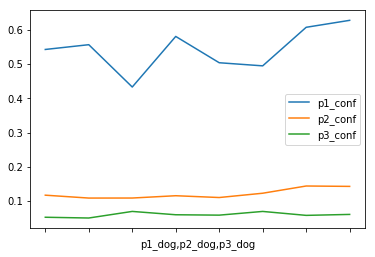

In [62]:
import matplotlib.pyplot as plt
#PLOTTING MEANS OF P1_CONF,P2_CONF,P3_CONF 

twitter_archive_master.groupby(['p1_dog','p2_dog','p3_dog'])['p1_conf','p2_conf','p3_conf'].mean().plot()